In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv("Stars.csv")

In [3]:
# Split the dataset into features and target variable
X = data[['Temperature', 'L', 'R', 'A_M', 'Color']]  # Features
y = data['Spectral_Class']  # Target variable

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [7]:
# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [8]:
# Classification Report
class_report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
# Set color palette
sns.set_palette("pastel")

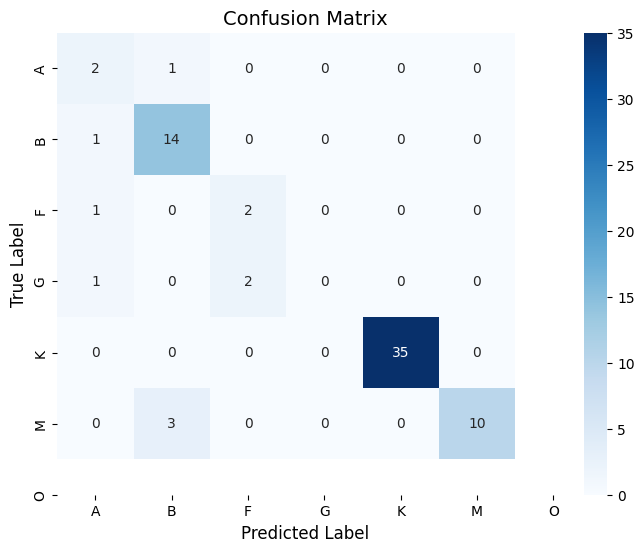

In [10]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

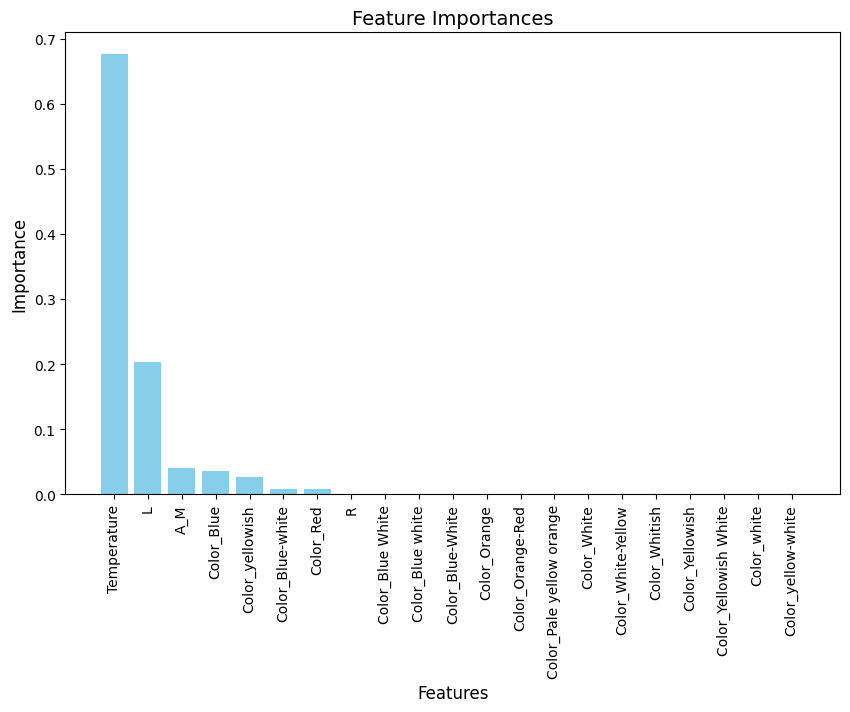

In [11]:
# Plot Feature Importances
plt.figure(figsize=(10, 6))
importances = clf.feature_importances_
features = X.columns
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
plt.bar(range(X.shape[1]), importances[indices], align='center', color='skyblue')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90, fontsize=10)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Feature Importances', fontsize=14)
plt.show()

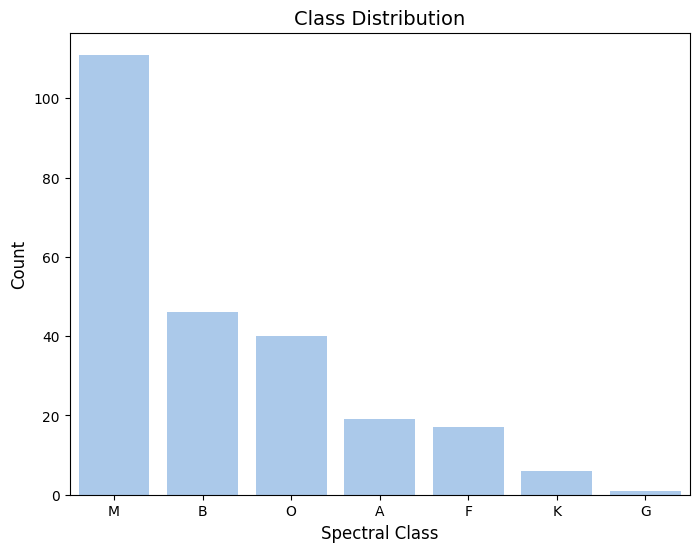

In [12]:
# Plot Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y, order=y.value_counts().index)
plt.xlabel('Spectral Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Class Distribution', fontsize=14)
plt.show()

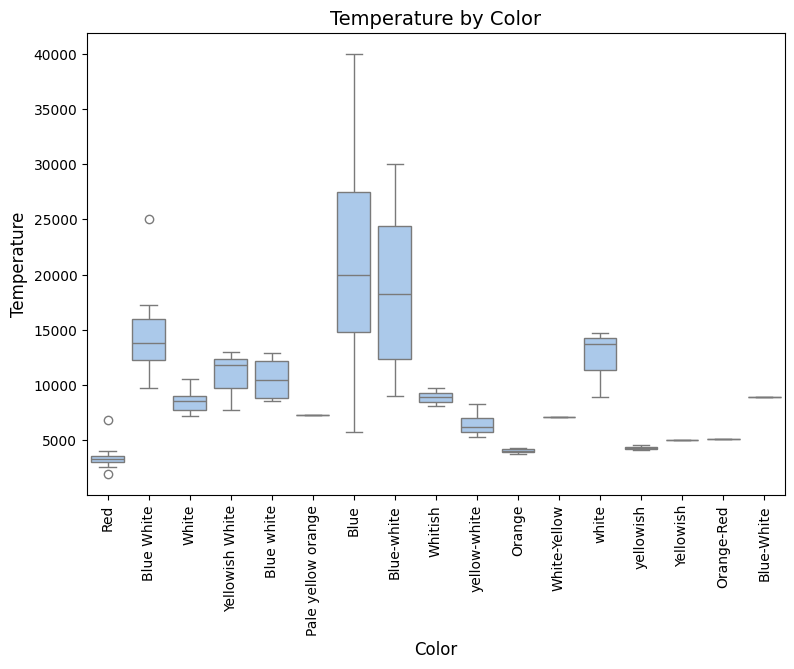

In [29]:
# Plot Temperature by Color
plt.figure(figsize=(9, 6))
sns.boxplot(x='Color', y='Temperature', data=data)
plt.xlabel('Color', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.title('Temperature by Color', fontsize=14)
plt.xticks(rotation=90)
plt.show()

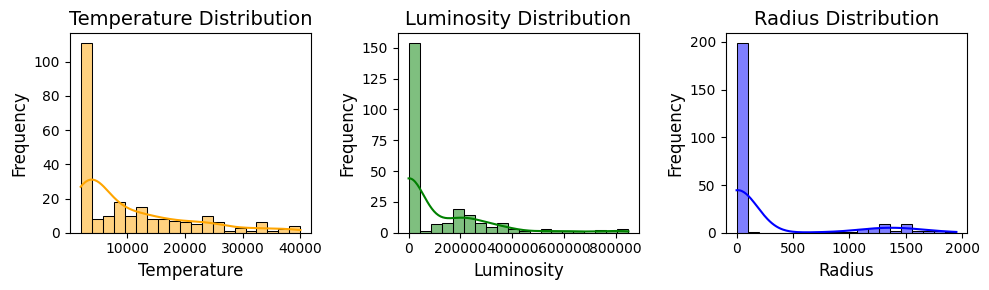

In [27]:
# Plot Temperature, Luminosity, and Radius Distribution
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
sns.histplot(data['Temperature'], bins=20, kde=True, color='orange')
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Temperature Distribution', fontsize=14)


plt.subplot(1, 3, 2)
sns.histplot(data['L'], bins=20, kde=True, color='green')
plt.xlabel('Luminosity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Luminosity Distribution', fontsize=14)

plt.subplot(1, 3, 3)
sns.histplot(data['R'], bins=20, kde=True, color='blue')
plt.xlabel('Radius', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Radius Distribution', fontsize=14)

plt.tight_layout()
plt.show()

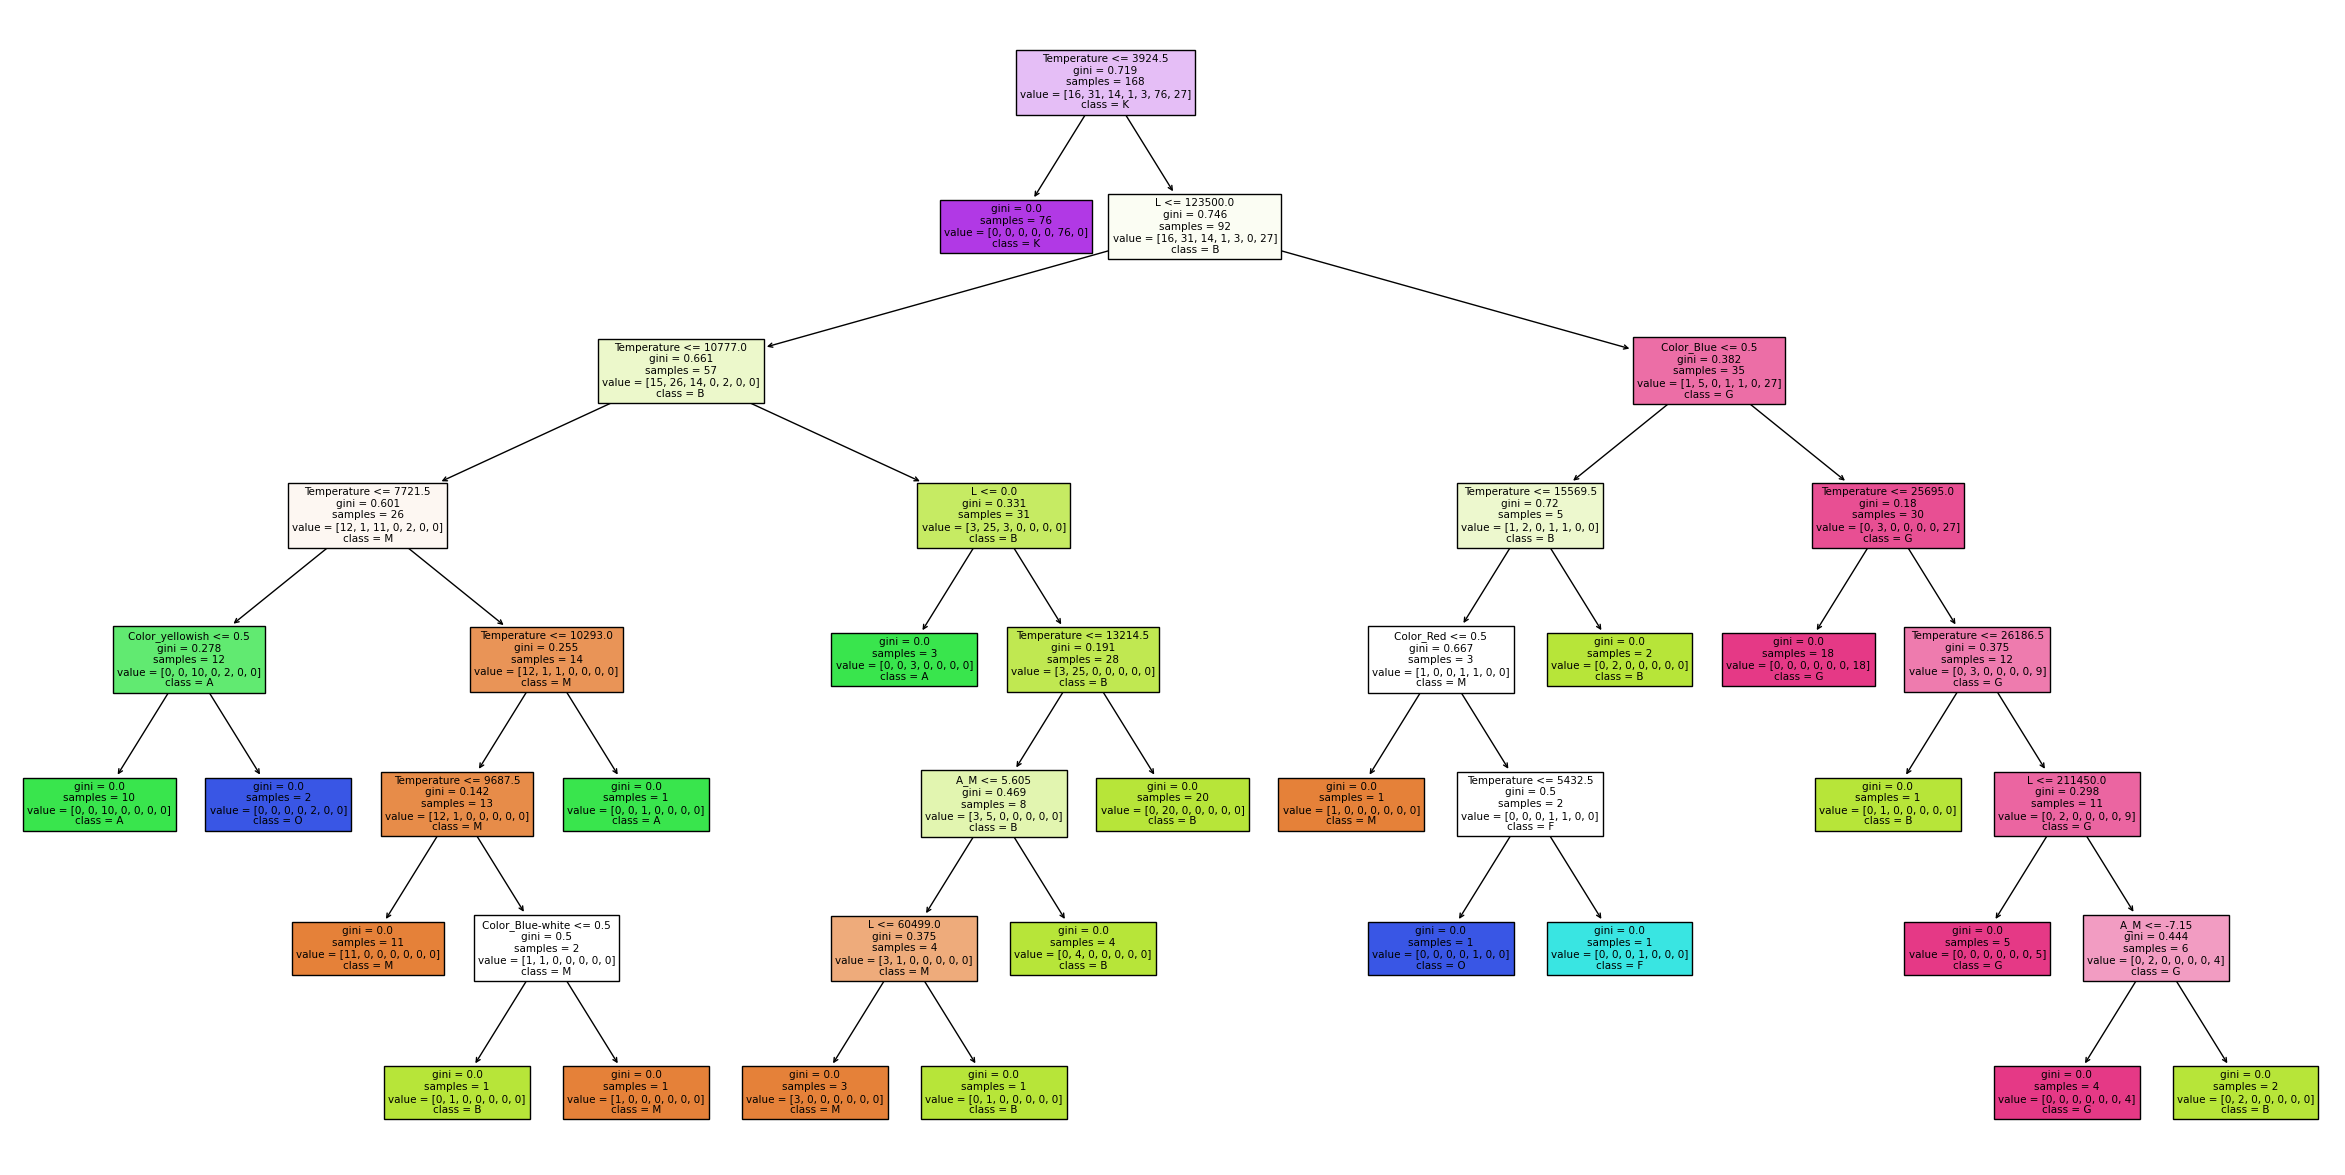

In [33]:
# Plot the Decision Tree
plt.figure(figsize=(30, 15))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=y.unique())
plt.show()

In [16]:
# Print Accuracy and Classification Report
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.875

Classification Report:
              precision    recall  f1-score   support

           A       0.40      0.67      0.50         3
           B       0.78      0.93      0.85        15
           F       0.50      0.67      0.57         3
           K       0.00      0.00      0.00         3
           M       1.00      1.00      1.00        35
           O       1.00      0.77      0.87        13

    accuracy                           0.88        72
   macro avg       0.61      0.67      0.63        72
weighted avg       0.87      0.88      0.86        72

